<a href="https://colab.research.google.com/github/Rohan-1103/Data-Science/blob/main/task_53.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd

Use the famous boston dataset and find out if there is multicollinearity or not. If there is multicollinearity try to remove it with help of steps taught in the session.

In [30]:
# Link - https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv

### Explanation of Columns in the Boston Housing Dataset

*   **`CRIM`**: Per capita crime rate by town.
*   **`ZN`**: Proportion of residential land zoned for lots over 25,000 sq.ft.
*   **`INDUS`**: Proportion of non-retail business acres per town.
*   **`CHAS`**: Charles River dummy variable (1 if tract borders river; 0 otherwise).
*   **`NOX`**: Nitric oxides concentration (parts per 10 million).
*   **`RM`**: Average number of rooms per dwelling.
*   **`AGE`**: Proportion of owner-occupied units built prior to 1940.
*   **`DIS`**: Weighted distances to five Boston employment centres.
*   **`RAD`**: Index of accessibility to radial highways.
*   **`TAX`**: Full-value property tax rate per 💲10,000.
*   **`PTRATIO`**: Pupil-teacher ratio by town.
*   **`B`**: $1000(Bk - 0.63)^2$ where `Bk` is the proportion of Black residents by town.
*   **`LSTAT`**: Percentage of lower status of the population.
*   **`MEDV`**: Median value of owner-occupied homes in $1000s (This is often the target variable in prediction tasks).

In [31]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


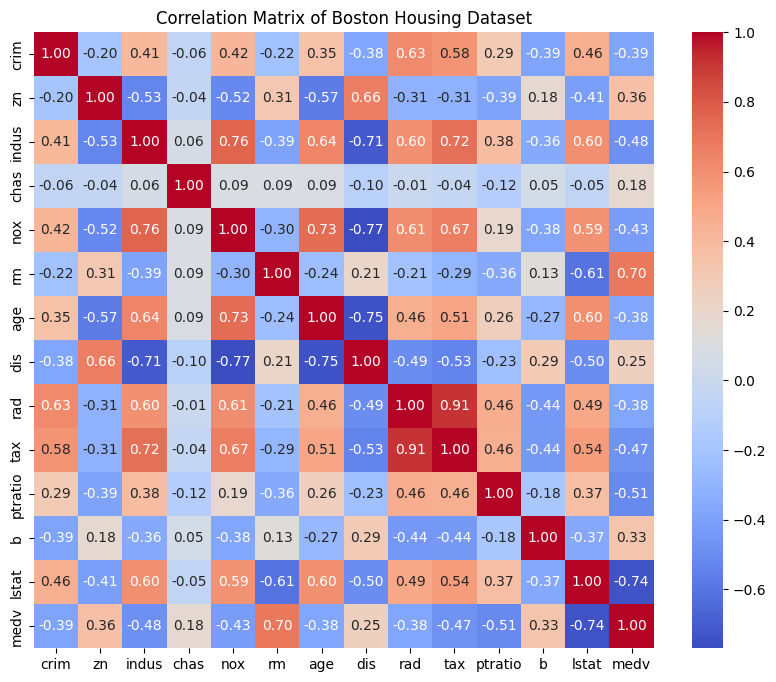

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Boston Housing Dataset')
plt.show()

This heatmap visualizes the correlation matrix of your DataFrame.

*   **Colors**: Reddish colors indicate positive correlation, while bluish colors indicate negative correlation. The intensity of the color shows the strength of the correlation.
*   **Numbers**: The numbers inside each cell represent the Pearson correlation coefficient, ranging from -1 to 1. A value closer to 1 means a strong positive correlation, closer to -1 means a strong negative correlation, and close to 0 means a weak or no linear correlation.

High correlation between independent variables (multicollinearity) can be identified by high absolute values (close to 1 or -1) in the off-diagonal cells. This can affect the stability and interpretability of regression models. We will analyze this chart to identify and remove multicollinearity if it exists.

In [33]:
corr_matrix

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [34]:
highly_correlated_features = set()
correlation_threshold = 0.70

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            highly_correlated_features.add(tuple(sorted((col1, col2))))

if highly_correlated_features:
    print(f"Found highly correlated feature pairs (absolute correlation > {correlation_threshold}):")
    for pair in highly_correlated_features:
        print(f"- {pair[0]} and {pair[1]} (Correlation: {corr_matrix.loc[pair[0], pair[1]]:.2f})")
else:
    print(f"No feature pairs found with an absolute correlation greater than {correlation_threshold}.")

Found highly correlated feature pairs (absolute correlation > 0.7):
- age and nox (Correlation: 0.73)
- indus and nox (Correlation: 0.76)
- lstat and medv (Correlation: -0.74)
- dis and nox (Correlation: -0.77)
- age and dis (Correlation: -0.75)
- rad and tax (Correlation: 0.91)
- dis and indus (Correlation: -0.71)
- indus and tax (Correlation: 0.72)


### Analysis of Highly Correlated Features

Based on the correlation matrix, here are the pairs of features with an absolute correlation greater than 0.70, indicating strong multicollinearity:

*   **`indus` and `nox`**: Correlation: 0.76
*   **`indus` and `tax`**: Correlation: 0.72
*   **`nox` and `dis`**: Correlation: -0.77
*   **`rad` and `tax`**: Correlation: 0.91

These pairs show very strong linear relationships. For example, `rad` and `tax` have a correlation of 0.91, meaning they move almost in perfect lockstep. `indus` and `nox` also show a strong positive correlation, while `nox` and `dis` have a strong negative correlation.

**Implications for Modeling:**

Such high correlations (multicollinearity) can pose problems for linear regression models, leading to:
*   Unstable and unreliable coefficient estimates.
*   Difficulty in interpreting the individual impact of each predictor.
*   Inflated standard errors of coefficients, making some variables appear statistically insignificant when they might be important.

**Next Steps:**

To address this, we should consider strategies like:
1.  **Feature selection**: Removing one of the highly correlated features.
2.  **Dimensionality reduction**: Techniques like Principal Component Analysis (PCA).
3.  **Regularization**: Using L1 (Lasso) or L2 (Ridge) regularization methods if using a regression model.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [36]:
lr = LinearRegression()
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=3)

In [38]:
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [39]:
print("R2 score: ", r2_score(y_test, y_pred))
# R2 score:  0.17372772318871849

R2 score:  0.7952617563243852


Found highly correlated feature pairs (absolute correlation > 0.7):
- rad and tax (Correlation: 0.91)
- age and nox (Correlation: 0.73)
- dis and indus (Correlation: -0.71)
- dis and nox (Correlation: -0.77)
- lstat and medv (Correlation: -0.74)
- age and dis (Correlation: -0.75)
- indus and nox (Correlation: 0.76)
- indus and tax (Correlation: 0.72)

### Explanation of Columns in the Boston Housing Dataset

*   **`CRIM`**: Per capita crime rate by town.
*   **`ZN`**: Proportion of residential land zoned for lots over 25,000 sq.ft.
*   **`INDUS`**: Proportion of non-retail business acres per town.
*   **`CHAS`**: Charles River dummy variable (1 if tract borders river; 0 otherwise).
*   **`NOX`**: Nitric oxides concentration (parts per 10 million).
*   **`RM`**: Average number of rooms per dwelling.
*   **`AGE`**: Proportion of owner-occupied units built prior to 1940.
*   **`DIS`**: Weighted distances to five Boston employment centres.
*   **`RAD`**: Index of accessibility to radial highways.
*   **`TAX`**: Full-value property tax rate per 💲10,000.
*   **`PTRATIO`**: Pupil-teacher ratio by town.
*   **`B`**: $1000(Bk - 0.63)^2$ where `Bk` is the proportion of Black residents by town.
*   **`LSTAT`**: Percentage of lower status of the population.
*   **`MEDV`**: Median value of owner-occupied homes in $1000s (This is often the target variable in prediction tasks).

In [40]:
df.drop(columns=['nox','indus'], inplace=True)
df

,crim,zn,chas,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,0,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,0,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,0,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,0,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,0,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,0,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,0,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,0,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,0,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [41]:
x_1 = df.drop(columns='medv')
y_1 = df['medv']
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_1, y_1, test_size=0.20, random_state=3)
lr.fit(x_train1, y_train1)
y_pred1 = lr.predict(x_test1)

In [42]:
print("R2 score: ", r2_score(y_test1, y_pred1))
# R2 score:  0.17224457918291566
# WE COOKED -> R2 REDUCED EVEN MORE

R2 score:  0.78223541390188


In [43]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
# Assuming 'medv' is the target variable, we'll exclude it for VIF calculation
X = df.drop('medv', axis=1)

# Add a constant to the independent variables for VIF calculation
X_constant = sm.add_constant(X)

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["feature"] = X_constant.columns
vif_data["VIF"] = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]

# Display the VIF results, sorting for easier interpretation
display(vif_data.sort_values(by='VIF', ascending=False))

,feature,VIF
0,const,405.939853
8,tax,6.930420
7,rad,6.866540
6,dis,3.294848
11,lstat,2.899438
5,age,2.865995
2,zn,2.262685
4,rm,1.888591
1,crim,1.780442
9,ptratio,1.600067


In [45]:
X_constant

,const,crim,zn,chas,rm,age,dis,rad,tax,ptratio,b,lstat
0,1.0,0.00632,18.0,0,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,1.0,0.02731,0.0,0,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,1.0,0.02729,0.0,0,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,1.0,0.03237,0.0,0,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,1.0,0.06905,0.0,0,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,0,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,1.0,0.04527,0.0,0,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,1.0,0.06076,0.0,0,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,1.0,0.10959,0.0,0,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [46]:
X_constant.shape[1]

12

### Interpretation of VIF Values

The Variance Inflation Factor (VIF) quantifies the severity of multicollinearity in a regression analysis.

*   **VIF = 1**: No correlation between the 'i'th predictor and the remaining predictor variables.
*   **1 < VIF < 5**: Moderate multicollinearity. This level is generally considered acceptable, but it's worth monitoring.
*   **VIF >= 5**: High multicollinearity. This indicates that the 'i'th predictor is highly correlated with one or more of the other predictors in the model. This can lead to unstable and unreliable regression coefficient estimates.

In your results, look for features with VIF values much greater than 5 (some sources even suggest 10) as candidates for removal or further investigation to address multicollinearity.

In [47]:
df1 = df.drop(columns=['rm','lstat'])
df1

,crim,zn,chas,age,dis,rad,tax,ptratio,b,medv
0,0.00632,18.0,0,65.2,4.0900,1,296,15.3,396.90,24.0
1,0.02731,0.0,0,78.9,4.9671,2,242,17.8,396.90,21.6
2,0.02729,0.0,0,61.1,4.9671,2,242,17.8,392.83,34.7
3,0.03237,0.0,0,45.8,6.0622,3,222,18.7,394.63,33.4
4,0.06905,0.0,0,54.2,6.0622,3,222,18.7,396.90,36.2
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,0,69.1,2.4786,1,273,21.0,391.99,22.4
502,0.04527,0.0,0,76.7,2.2875,1,273,21.0,396.90,20.6
503,0.06076,0.0,0,91.0,2.1675,1,273,21.0,396.90,23.9
504,0.10959,0.0,0,89.3,2.3889,1,273,21.0,393.45,22.0


In [48]:
x_2 = df1.drop(columns='medv')
y_2 = df1['medv']
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_2, y_2, test_size=0.20, random_state=3)
lr.fit(x_train2, y_train2)
y_pred2 = lr.predict(x_test2)

print("R2 Score: ", r2_score(y_test2, y_pred2))

R2 Score:  0.3764872555251193


In [49]:
df2 = df.drop(columns=['tax','rad'])
df2

,crim,zn,chas,rm,age,dis,ptratio,b,lstat,medv
0,0.00632,18.0,0,6.575,65.2,4.0900,15.3,396.90,4.98,24.0
1,0.02731,0.0,0,6.421,78.9,4.9671,17.8,396.90,9.14,21.6
2,0.02729,0.0,0,7.185,61.1,4.9671,17.8,392.83,4.03,34.7
3,0.03237,0.0,0,6.998,45.8,6.0622,18.7,394.63,2.94,33.4
4,0.06905,0.0,0,7.147,54.2,6.0622,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,0,6.593,69.1,2.4786,21.0,391.99,9.67,22.4
502,0.04527,0.0,0,6.120,76.7,2.2875,21.0,396.90,9.08,20.6
503,0.06076,0.0,0,6.976,91.0,2.1675,21.0,396.90,5.64,23.9
504,0.10959,0.0,0,6.794,89.3,2.3889,21.0,393.45,6.48,22.0


In [50]:
x_3 = df2.drop(columns='medv')
y_3 = df2['medv']
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_3, y_3, test_size=0.20, random_state=3)
lr.fit(x_train3, y_train3)
y_pred3 = lr.predict(x_test3)

print("R2 Score: ", r2_score(y_test3, y_pred3))

R2 Score:  0.7741626021217377


### Condition Number for Multicollinearity Check

The condition number is another diagnostic tool used to detect multicollinearity. It measures the sensitivity of the output of a function to changes in the input, and in the context of regression, it indicates how unstable the estimation of regression coefficients might be due to multicollinearity.

In [51]:
import numpy as np

# Calculate the condition number of the design matrix (X_constant)
# X_constant already includes the constant term and independent variables from the VIF calculation.
condition_num = np.linalg.cond(X_constant)
condition_num1 = np.linalg.cond(df2)

print(f"The Condition Number is: {condition_num:.2f}")
print(f"The Condition Number is: {condition_num1:.2f}")

The Condition Number is: 11306.09
The Condition Number is: 1531.05


### Interpretation of Condition Number

The condition number provides an indication of multicollinearity:

*   **Less than 100**: Generally considered to have no significant multicollinearity.
*   **Between 100 and 1000**: Moderate multicollinearity may be present.
*   **Greater than 1000**: Strong multicollinearity is indicated, suggesting that the least squares estimates are very sensitive to small changes in the data and may be unreliable.

A high condition number (especially if it's much greater than 1000) suggests that some linear combination of the predictor variables is nearly collinear. This can make it difficult to determine the individual impact of each predictor on the dependent variable.